In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/nyse/prices-split-adjusted.csv', header = 0)

In [3]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
df.shape

(851264, 7)

In [5]:
df.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [6]:
df_yahoo = df[df['symbol']=='YHOO']
df_yahoo.head()

,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


In [7]:
df_yahoo.shape

(1762, 7)

In [8]:
df_yahoo.describe

<bound method NDFrame.describe of               date symbol       open      close        low       high  \
713     2010-01-04   YHOO  16.940001  17.100000  16.879999  17.200001   
1181    2010-01-05   YHOO  17.219999  17.230000  17.000000  17.230000   
1649    2010-01-06   YHOO  17.170000  17.170000  17.070000  17.299999   
2117    2010-01-07   YHOO  16.809999  16.700001  16.570000  16.900000   
2585    2010-01-08   YHOO  16.680000  16.700001  16.620001  16.760000   
...            ...    ...        ...        ...        ...        ...   
849257  2016-12-23   YHOO  38.459999  38.660000  38.369999  38.810001   
849757  2016-12-27   YHOO  38.590000  38.919998  38.500000  39.070000   
850257  2016-12-28   YHOO  39.119999  38.730000  38.709999  39.220001   
850757  2016-12-29   YHOO  38.759998  38.639999  38.480000  38.930000   
851257  2016-12-30   YHOO  38.720001  38.669998  38.430000  39.000000   

            volume  
713     16587400.0  
1181    11718100.0  
1649    16422000.0  
2117 

In [9]:
df_yahoo.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [10]:
df_yahoo.loc[:, 'date'] = pd.to_datetime(df_yahoo['date'])
print(df_yahoo['date'].dtype)

object


In [11]:
df_yahoo = df_yahoo.set_index("date")

/opt/conda/lib/python3.10/site-packages/pandas/core/indexes/base.py:7587: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [12]:
df_yahoo.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


In [13]:
print(df_yahoo.shape)

(1762, 6)


In [14]:
yahoo_data = df_yahoo.asfreq('b')

In [15]:
print(yahoo_data.shape)

(1825, 6)


In [16]:
yahoo_data.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-26,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0
2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0
2016-12-29,YHOO,38.759998,38.639999,38.480000,38.930000,4170200.0
2016-12-30,YHOO,38.720001,38.669998,38.430000,39.000000,6431600.0


In [17]:
yahoo_data.isnull().sum()

symbol    63
open      63
close     63
low       63
high      63
volume    63
dtype: int64

In [18]:
null_data = yahoo_data[yahoo_data. isnull().any(axis=1) ]
null_data.head()
null_dates = null_data.index.tolist()

In [19]:
import calendar
import datetime

holidays = []

for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month==1:
        if day==1:
            # New year day
            holidays.append(date)
        elif day==2 and week_day=='Monday':
            # Observed New Year Day
            holidays.append(date)
        elif day>=15 and day<=21 and week_day=='Monday':
            # Martin Luther King, Jr. Day
            holidays.append(date)

    elif month==2:
        # Washington's Birthday
        if day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==5:
        # Memorial day
        if day>=25 and day<=31 and week_day=='Monday':
            holidays.append(date)

    elif month==7:
        # Independence day
        if day==4:
            holidays.append(date)
        # Observed Independence  Day
        elif day==5 and week_day=='Monday':
            holidays.append(date)
        elif day==3 and week_day=='Friday':
            holidays.append(date)

    elif month == 9:
        # Labour day
        if day>=1 and day<=7 and week_day=='Monday':
            holidays.append(date)

    elif month==11:
        # Thanksgiving Day
        if week_day=='Thursday' and day>=22 and day<=28:
            holidays.append(date)

    elif month==12:
        # Christmas Day
        if day==25:
            holidays.append(date)
        # Observed Christmas Day
        elif day==24 and week_day=='Friday':
            holidays.append(date)
        elif day==26 and week_day=='Monday':
            holidays.append(date)

good_fridays = [ datetime.date(2010,4,2), datetime.date(2011,4,22), datetime.date(2012,4,6), datetime.date(2013,3,29), datetime.date(2014,4,18), datetime.date(2015,4,3), datetime.date(2016,3,25) ]
holidays = holidays + [pd.to_datetime(date) for date in good_fridays]

non_holidays = [x for x in null_dates if x not in holidays]
print(non_holidays)

[Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00')]


In [20]:
print(yahoo_data.shape)
modified_df = yahoo_data.drop(holidays)
print(modified_df.shape)

(1825, 6)
(1764, 6)


In [21]:
print("Before filling missing values:\n", modified_df.isna().sum())
modified_df = modified_df.bfill(axis ='rows')
print("\nAfter filling missing values:\n",modified_df.isna().sum())

Before filling missing values:
 symbol    2
open      2
close     2
low       2
high      2
volume    2
dtype: int64

After filling missing values:
 symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


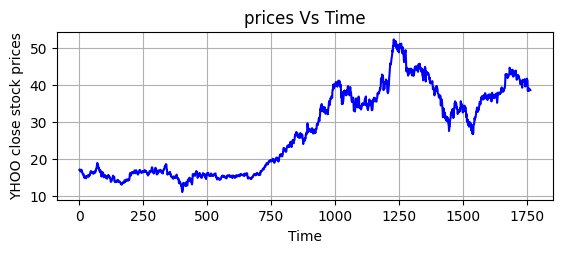

In [22]:
def plotter(code):
    global closing_stock
    plt.subplot(211)
    company_close = modified_df[modified_df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()

plotter("YHOO")

In [23]:
n_train = int(len(closing_stock) * 0.80)
n_remaining = len(closing_stock) - n_train

n_val = int(n_remaining*0.50)
n_test = n_remaining - n_val 
print("Train samples:",n_train, "Validation Samples:",n_val,"Test Samples:", n_test)

Train samples: 1411 Validation Samples: 176 Test Samples: 177


In [24]:
train_data = closing_stock[0:n_train]
print(train_data.shape)

(1411, 1)


In [25]:
val_data = closing_stock[n_train:n_train+n_val]
print(val_data.shape)

(176, 1)


In [26]:
test_data = closing_stock[n_train+n_val:]
print(test_data.shape)

(177, 1)


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0, 1))

In [28]:
train = scaler.fit_transform(train_data)

In [29]:
val = scaler.fit_transform(val_data)

In [30]:
test = scaler.fit_transform(test_data)

In [31]:
def create_dataset(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [32]:
n_features = 2

In [33]:
trainX, trainY = create_dataset(train, n_features)
valX, valY = create_dataset(val, n_features)
testX, testY = create_dataset(test, n_features)

In [34]:
print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(1408, 2) (1408,) (173, 2) (173,) (174, 2) (174,)


In [35]:
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error

2024-02-11 19:19:45.728306: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-11 19:19:45.728454: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-11 19:19:45.882018: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [36]:
model = keras.Sequential()


In [37]:
trainX = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
valX = valX.reshape(valX.shape[0], 1, valX.shape[1])

In [38]:
# First GRU layer
model.add(layers.GRU(units=100, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Second GRU layer
model.add(layers.GRU(units=150, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Third GRU layer
model.add(layers.GRU(units=100, activation='tanh'))
model.add(layers.Dropout(0.2))

# The output layer
model.add(layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

print(model.summary())


history = model.fit(trainX,trainY,epochs=100,batch_size=128, verbose=1, validation_data = (valX,valY))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 100)            31200     
                                                                 
 dropout (Dropout)           (None, 1, 100)            0         
                                                                 
 gru_1 (GRU)                 (None, 1, 150)            113400    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 gru_2 (GRU)                 (None, 100)               75600     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [39]:
import math

def model_score(model, X_train, y_train, X_val, y_val , X_test, y_test):
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format(train_score[0], math.sqrt(train_score[0])))

    print('Validation Score:')
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (val_score[0], math.sqrt(val_score[0])))

    print('Test Score')
    X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    test_score = model.evaluate(X_test_reshaped, y_test, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format(test_score[0], math.sqrt(test_score[0])))


model_score(model, trainX, trainY ,valX, valY , testX, testY)

Train Score:
MSE: 0.00020 , RMSE: 0.01
Validation Score:
MSE: 0.00472 , RMSE: 0.07
Test Score
MSE: 0.00442 , RMSE: 0.07


In [40]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


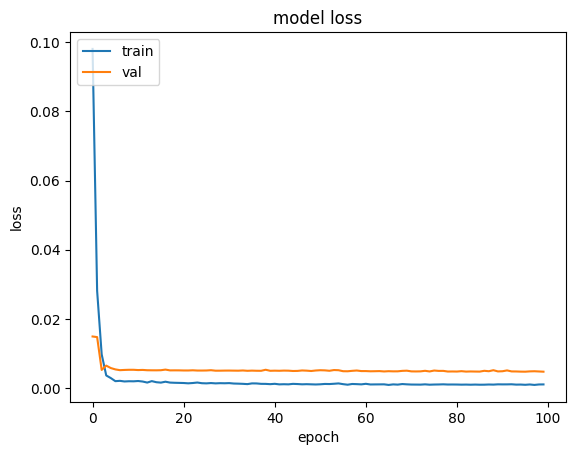

In [41]:
plt.plot(history.history['loss'])  # plotting train loss
plt.plot(history.history['val_loss'])  # plotting validation loss

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

6/6 [==============================] - 1s 4ms/step
[[37.525   ]
 [37.292778]
 [37.13225 ]
 [36.984035]
 [36.684483]
 [36.58022 ]
 [36.534668]
 [36.151825]
 [35.984272]
 [36.6343  ]]
[[37.23]
 [37.11]
 [36.95]
 [36.59]
 [36.6 ]
 [36.53]
 [36.01]
 [36.  ]
 [36.94]
 [37.23]]


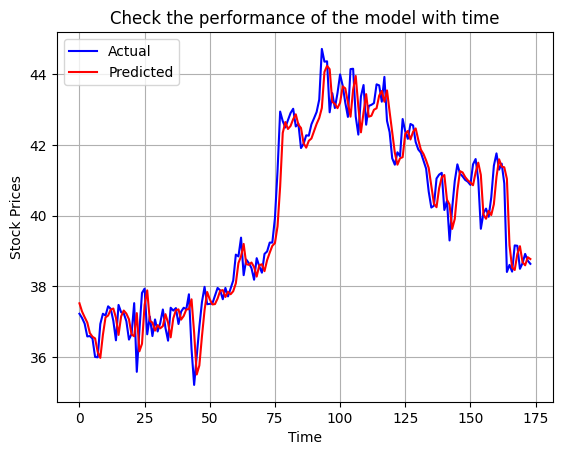

In [42]:
pred = model.predict(testX.reshape((testX.shape[0], 1, testX.shape[1])))
pred = scaler.inverse_transform(pred)
print(pred[:10])

testY_actual = testY.reshape(testY.shape[0] , 1)
testY_actual = scaler.inverse_transform(testY_actual)
print(testY_actual[:10])

plt.plot(testY_actual , 'b')
plt.plot(pred , 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the performance of the model with time')
plt.legend(['Actual', 'Predicted'], loc='upper left')

plt.grid(True)
plt.show()